# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.642259e+01     1.404646e+01
 * time: 0.0016219615936279297
     1     3.458625e+01     1.198408e+01
 * time: 0.004345893859863281
     2     2.537343e+01     3.211521e+00
 * time: 0.010707855224609375
     3     2.479588e+01     6.678800e+00
 * time: 0.016628026962280273
     4     2.117301e+01     2.982254e+00
 * time: 0.022223949432373047
     5     1.982612e+01     1.893399e+00
 * time: 0.027714014053344727
     6     1.899505e+01     1.644167e+00
 * time: 0.032366037368774414
     7     1.846473e+01     1.616158e+00
 * time: 0.03687906265258789
     8     1.818495e+01     1.024770e+00
 * time: 0.041275978088378906
     9     1.793831e+01     9.032741e-01
 * time: 0.04577803611755371
    10     1.773198e+01     6.901496e-01
 * time: 0.050212860107421875
    11     1.761075e+01     9.726929e-01
 * time: 0.05369400978088379
    12     1.755125e+01     8.115735e-01
 * time: 0.057298898696899414
    13     1.751055e+01     1.076010e+

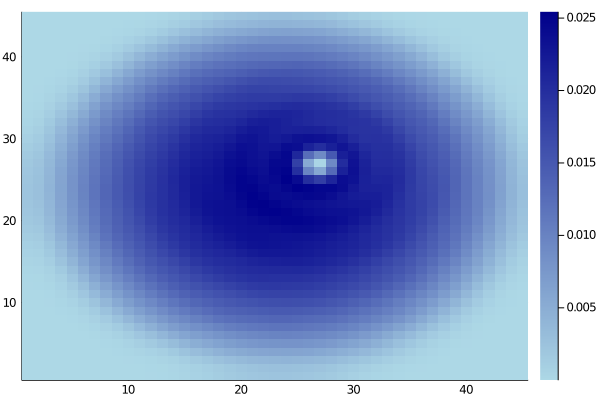

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)